In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

sys.path.insert(1, "../src")
from Loess import *

In [2]:
df = pd.read_csv("datasets/dataset.csv")

xx = df[["radiation", "temperature", "wind"]].to_numpy()
yy = df["ozone"].to_numpy()

loess = Loess(xx, yy)

In [3]:
a=np.random.rand(111,3)
a = a * (xx.max(axis=0) - xx.min(axis=0)) + xx.min(axis=0)

In [4]:
res = []

for vec in xx:
    res.append(loess.estimate(vec, 60, degree=2))
    
res[:5]

[(array([ 0.75382977,  0.36574148, -1.47296452, -2.06499529, -0.43734432,
          0.69720062, -0.21518961,  1.58075085,  0.03503845,  2.19014385]),
  array([1.        , 0.55963303, 0.25      , 0.27717391, 0.31318913,
         0.13990826, 0.15511568, 0.0625    , 0.06929348, 0.07682538]),
  36.83547382425213),
 (array([ 0.96116942, -0.28930222, -1.30407575, -2.7099771 ,  0.19637196,
          0.45763712,  0.27288117,  0.91666159,  1.43215118,  2.11865691]),
  array([1.        , 0.33944954, 0.375     , 0.30978261, 0.11522599,
         0.12729358, 0.10515556, 0.140625  , 0.11616848, 0.09596526]),
  24.814859794180208),
 (array([ 0.57286984,  0.12085043, -1.77282709, -0.47832114, -0.26746345,
          0.31234197,  0.27373247,  1.50782753,  1.21923097, -0.48084928]),
  array([1.        , 0.43425076, 0.425     , 0.55978261, 0.18857373,
         0.18455657, 0.24308603, 0.180625  , 0.23790761, 0.31335657]),
  15.968039499040902),
 (array([ 0.64349035, -0.93966508,  0.01520046, -0.65583924,  

In [5]:
xx[0]

array([190. ,  67. ,   7.4])

In [6]:
w = np.array([i[0] for i in res])
xp = np.array([i[1] for i in res])
results = np.array([i[2] for i in res])

w.shape

(111, 10)

In [15]:
xp.shape

(111, 10)

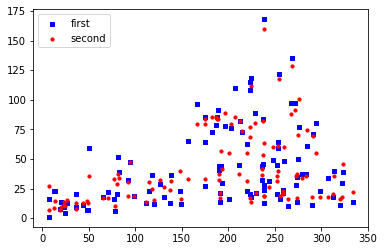

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

rad_in = xx[:, 0]
yhat = np.array(w.dot(xp.T)[:, 0])[np.argsort(rad_in)]

ax1.scatter(df["radiation"].to_numpy(), yy, s=10, c='b', marker="s", label='first')
ax1.scatter(rad_in, results, s=10, c='r', marker="o", label='second')
# ax1.plot(rad_in, yhat)
plt.legend(loc='upper left');
plt.show()

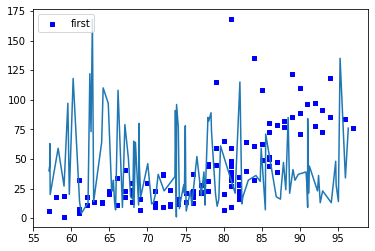

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

temp_in = a[:, 1]

yhat = np.array(res)[np.argsort(temp_in)]

ax1.scatter(df["temperature"].to_numpy(), yy, s=10, c='b', marker="s", label='first')
# ax1.scatter(temp_in, res, s=10, c='r', marker="o", label='second')
ax1.plot(np.sort(temp_in), yhat)
plt.legend(loc='upper left');
plt.show()

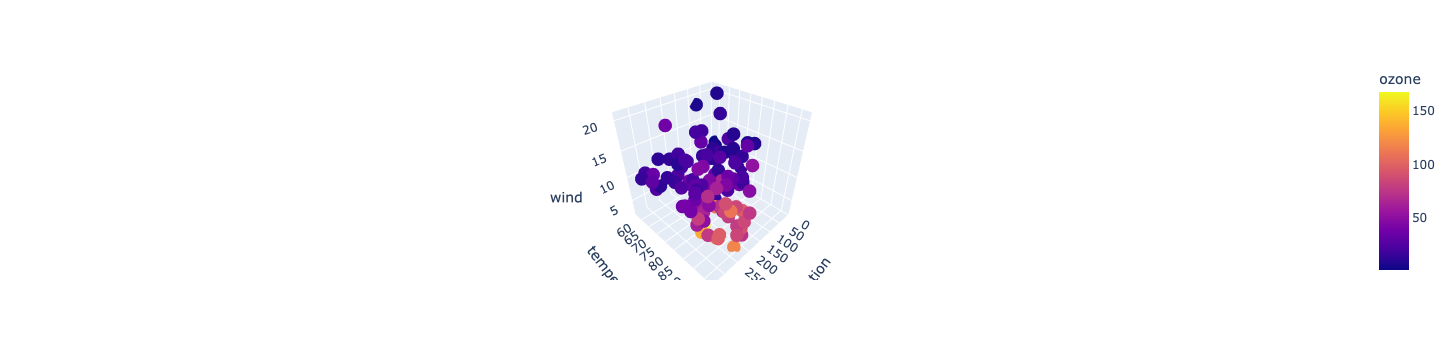

In [61]:
import plotly.express as px

df_obs = pd.DataFrame(a[:, [0, 1, 2]], columns = ['radiation', 'temperature', 'wind'])
df_obs['ozone'] = res

fig = px.scatter_3d(df, x='radiation', y='temperature', z='wind', color='ozone')
fig.write_html("./file.html")
fig.show()

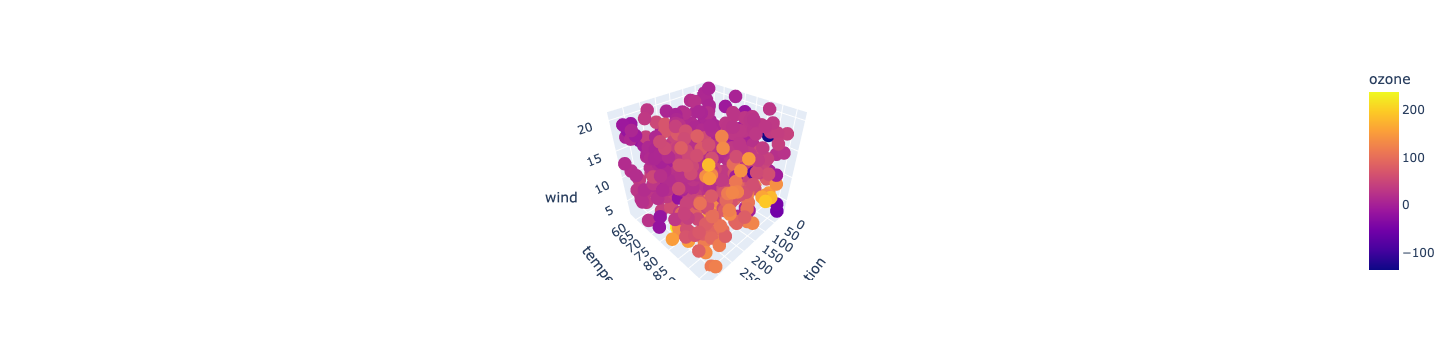

In [62]:
df_obs = pd.DataFrame(a[:, [0, 1, 2]], columns = ['radiation', 'temperature', 'wind'])
df_obs['ozone'] = res

fig = px.scatter_3d(df_obs, x='radiation', y='temperature', z='wind', color='ozone')
fig.write_html("./file2.html")
fig.show()

In [7]:
np.array([1,2,3,4,5])[[2,1]]

array([3, 2])

In [8]:
def get_min_range(distances, window):
    min_idx = np.argmin(distances)
    n = len(distances)
    if min_idx == 0:
        return np.arange(0, window)
    if min_idx == n-1:
        return np.arange(n - window, n)

    min_range = [min_idx]
    while len(min_range) < window:
        i0 = min_range[0]
        i1 = min_range[-1]
        if i0 == 0:
            min_range.append(i1 + 1)
        elif i1 == n-1:
            min_range.insert(0, i0 - 1)
        elif distances[i0-1] < distances[i1+1]:
            min_range.insert(0, i0 - 1)
        else:
            min_range.append(i1 + 1)
    return np.array(min_range)

In [16]:
get_min_range([3,0,4,5,1], 2)

array([0, 1])

In [107]:
def add_polynomial_features(X, degree):
    B = np.ones((X.shape[0], 1))
    B = np.concatenate((B, X), axis=1)
    for d in range(2, degree+1):
        A = X ** d
        B = np.concatenate((B, A), axis=1)
        
    return B

In [109]:
xcf = np.array([[1,2,3], [4,5,6]])

add_polynomial_features(xcf, 3)

array([[  1.,   1.,   2.,   3.,   1.,   4.,   9.,   1.,   8.,  27.],
       [  1.,   4.,   5.,   6.,  16.,  25.,  36.,  64., 125., 216.]])

In [103]:
B = np.ones((xcf.shape[0], 1))
np.concatenate((B, xcf), axis=1)

array([[1., 1., 2., 3.],
       [1., 4., 5., 6.]])